# Project Using HSBC Hong Kong Open APIs
In this notebook, I download data through the Branch and ATM APIs. Then, I perform some simple analysis using Python on the branch and ATM networks. 
This is the url of the open APIs: https://developer.hsbc.com.hk/

#### 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import geopy.distance

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

# All requested packages already installed.



#### 2. Initialization for Using the Open APIs

In [2]:
# The code was removed by Watson Studio for sharing.

After testing my codes in the Sandbox, I run my codes in Live Environment

#### 3. Extract Data from the ATM API
Data is stored in a DataFrame called ATM. The first five rows of the ATM DataFrame are printed.

In [3]:
requests.adapters.DEFAULT_RETRIES = 5
response = requests.session()
response.keep_alive = False

response = requests.get(
    url = URL,
    verify = False,
    headers = My_header
).json()

ATM_list = response['data'][0]['Brand'][0]

ATM = pd.DataFrame(columns=['ATM Name', 'District', 'Latitude', 'Longitude', 'CoinSort', 'ForeignCurrency', 'BillPayment','CashWithdrawal','CashDeposit','ChequeDeposit'])

for i in range(len(ATM_list['ATM'])):
    ATM.loc[i,'ATM Name'] = ATM_list['ATM'][i]['ATMName']
    ATM.loc[i,'District'] = ATM_list['ATM'][i]['ATMAddress']['DistrictName']
    ATM.loc[i,'Latitude'] = ATM_list['ATM'][i]['ATMAddress']['LatitudeDescription']
    ATM.loc[i,'Longitude'] = ATM_list['ATM'][i]['ATMAddress']['LongitudeDescription']
    ATM.loc[i,'CoinSort'] = ATM_list['ATM'][i]['ATMServices']['CoinSortIndicator']
    ATM.loc[i,'ForeignCurrency'] = ATM_list['ATM'][i]['ATMServices']['ForeignCurrencyIndicator']
    ATM.loc[i,'BillPayment'] = ATM_list['ATM'][i]['ATMServices']['BillPaymentIndicator']
    ATM.loc[i,'CashWithdrawal'] = ATM_list['ATM'][i]['ATMServices']['CashWithdrawalIndicator']
    ATM.loc[i,'CashDeposit'] = ATM_list['ATM'][i]['ATMServices']['CashDepositIndicator']
    ATM.loc[i,'ChequeDeposit'] = ATM_list['ATM'][i]['ATMServices']['ChequeDepositIndicator']
    
ATM['Latitude'] = ATM['Latitude'].astype(float)
ATM['Longitude'] = ATM['Longitude'].astype(float)
print(ATM.head())
#print(ATM.loc[0,'CoinSort']==False)
#print(response['data'][0])
#print(response['data'][0]['Brand'][0])
#print(response['data'][0]['Brand'][0]['ATM'][0])

#print(response)
#print('Status code: ' + str(response.status_code))
#print('Response Content: ' + str(response.content))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


                          ATM Name  District   Latitude   Longitude CoinSort  \
0     Tap Shek Kok Express Banking  Tuen Mun  22.375760  113.921160    False   
1  Lei Tung Estate Express Banking  Southern  22.240920  114.155980    False   
2                Stanley Plaza ATM  Southern  22.219588  114.209623    False   
3   South Horizons Express Banking  Southern  22.244000  114.146683    False   
4            Cheung Wah Estate ATM     North  22.493087  114.141154    False   

  ForeignCurrency BillPayment CashWithdrawal CashDeposit ChequeDeposit  
0           False        True           True       False         False  
1           False        True           True       False         False  
2           False        True           True        True         False  
3           False        True           True        True          True  
4           False        True           True       False         False  


#### 4. Analysis of ATM Functions

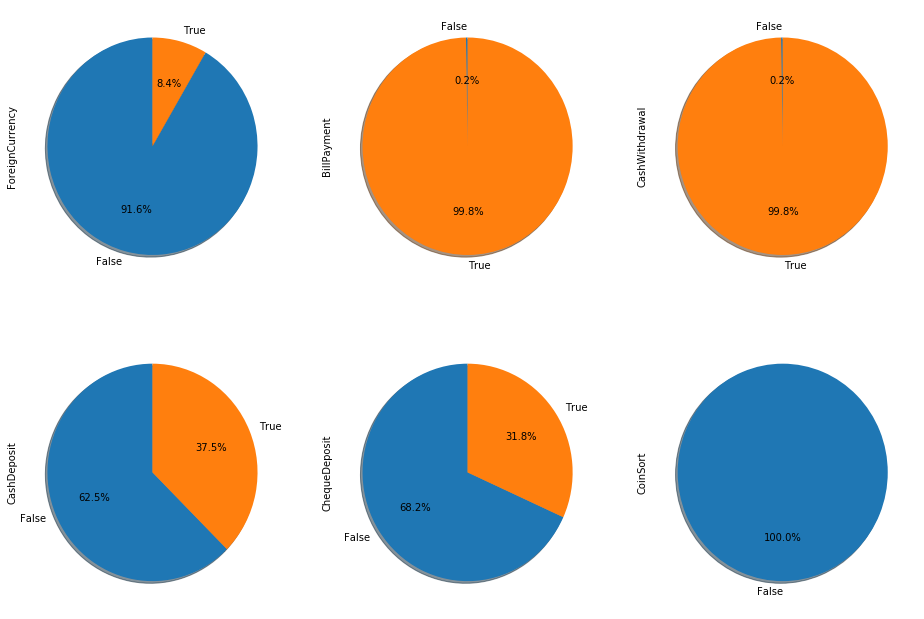

In total, there are 403 HSBC ATM locations in Hong Kong

Out of the 403 ATMs, 34 have Foreign Currency Function, 369 do not

Out of the 403 ATMs, 402 have Bill Payment Function, 1 do not

Out of the 403 ATMs, 402 have Cash Withdrawal Function, 1 do not

Out of the 403 ATMs, 151 have Cash Deposit Function, 252 do not

Out of the 403 ATMs, 128 have Cheque Deposit Function, 275 do not

Out of the 403 ATMs, 0 have Coin Sort Function, 403 do not


In [4]:
# The code was removed by Watson Studio for sharing.

#### 5. Extract data from the Branch API

In [5]:
#URL = 'https://developer.hsbc.com.hk/sandbox/open-banking/v1.0/branches'
URL = 'https://api.hsbc.com.hk/live/open-banking/v1.0/branches'

requests.adapters.DEFAULT_RETRIES = 5
response_B = requests.session()
response_B.keep_alive = False

response_B = requests.get(
    url = URL,
    verify = False,
    headers = My_header
).json()

branch_list = response_B['data'][0]['Brand'][0]


branch = pd.DataFrame(columns=['Branch Name', 'Branch Type', 'District', 'Latitude', 'Longitude', 'Address'])

for i in range(len(branch_list['Branch'])):
    branch.loc[i,'Branch Name'] = branch_list['Branch'][i]['BranchName']
    branch.loc[i,'Branch Type'] = branch_list['Branch'][i]['BranchType']
    branch.loc[i,'District'] = branch_list['Branch'][i]['BranchAddress']['DistrictName']
    branch.loc[i,'Latitude'] = branch_list['Branch'][i]['BranchAddress']['LatitudeDescription']
    branch.loc[i,'Longitude'] = branch_list['Branch'][i]['BranchAddress']['LongitudeDescription']
    branch.loc[i,'Address'] = branch_list['Branch'][i]['BranchAddress']['AddressLine'][0]

branch['Latitude'] = branch['Latitude'].astype(float)
branch['Longitude'] = branch['Longitude'].astype(float)
print('There are totally {} HSBC branches, including {} Retail and {} Corporate branches\n'.format(branch.shape[0], branch[branch['Branch Type']=='Retail'].shape[0],branch[branch['Branch Type']=='Corporate'].shape[0]))
#print(branch.head())
#print(branch.loc[0,'Address'])

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


There are totally 178 HSBC branches, including 159 Retail and 19 Corporate branches



In [6]:
geolocator = Nominatim(user_agent="hsbc_explorer")

address = 'Hong Kong, China'
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# get better window
latitude, longtitude = 22.383205, 114.141907
print('The geograpical coordinate of Hong Kong used are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Hong Kong used are 22.383205, 114.1628131.


#### 6. Visualize the locations of HSBC branches and ATMs in Hong Kong
ATMs are presented by blue dots, Retail branches by yellow circles and Corporates branches in red circles in the map.

In [7]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add ATMs to map
for dis, lat, lng in zip(ATM['ATM Name'], ATM['Latitude'], ATM['Longitude']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_newyork)  

i = 0
# add branches to map
for dis, lat, lng in zip(branch['Branch Name'], branch['Latitude'], branch['Longitude']):
    label = '{}'.format(dis)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='yellow' if branch.loc[i,'Branch Type']=="Retail" else 'red',
        fill=True,
        fill_color='#ebf925',
        fill_opacity=0,
        parse_html=False).add_to(map_newyork)
    i = i + 1
    
map_newyork

#### 7. Clustering the ATMs
Use K-means algorithm to cluster the ATMs. First of all, determine the best number of clusters for the K-means.

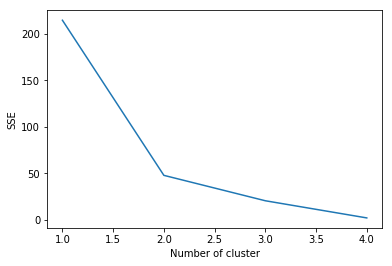

In [8]:
from sklearn.cluster import KMeans
%matplotlib inline

sse = {}
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(ATM[['CoinSort', 'ForeignCurrency', 'BillPayment','CashWithdrawal','CashDeposit','ChequeDeposit']])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Based on the results, it is determined to segment the ATMs into 4 clusters. 

In [9]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ATM[['CoinSort', 'ForeignCurrency', 'BillPayment','CashWithdrawal','CashDeposit','ChequeDeposit']])

# add clustering labels
ATM.insert(0, 'Cluster Labels', kmeans.labels_)

Plot the clusters by different colors

In [10]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
#len(ys) is the number of color
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# change the green color
rainbow[2] = '#1d8231'

# add markers to the map
markers_colors = []
for lat, lon, name, cluster in zip(ATM['Latitude'], ATM['Longitude'], ATM['ATM Name'], ATM['Cluster Labels']):
    label = folium.Popup(str(name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 8. Examine the Clusters

##### Cluster 0 (Red) - Bill Payment and Cash Withdrawal Functions only
Print the first five rows for illustration

In [11]:
print('There are {} HSBC ATMs that have both Bill Payment and Cash Withdrawal Functions\n'.format(ATM[ATM['Cluster Labels'] == 0].shape[0]))
ATM.loc[ATM['Cluster Labels'] == 0, ATM.columns[[1,2]+list(range(5,ATM.shape[1]))]].head()

There are 252 HSBC ATMs that have both Bill Payment and Cash Withdrawal Functions



,ATM Name,District,CoinSort,ForeignCurrency,BillPayment,CashWithdrawal,CashDeposit,ChequeDeposit
0,Tap Shek Kok Express Banking,Tuen Mun,False,False,True,True,False,False
1,Lei Tung Estate Express Banking,Southern,False,False,True,True,False,False
4,Cheung Wah Estate ATM,North,False,False,True,True,False,False
5,Wah Ming Estate ATM,North,False,False,True,True,False,False
6,Kingswood Richly Plaza (7-Eleven) ATM,Yuen Long,False,False,True,True,False,False


##### Cluster 1 (Purple) - Bill Payment, Cash Withdrawal, Cash Deposits and Cheque Deposits Functions only
Print the first five rows for illustration

In [12]:
print('There are {} HSBC ATMs that have Bill Payment, Cash Withdrawal, Cash Deposits and Cheque Deposits Functions\n'.format(ATM[ATM['Cluster Labels'] == 1].shape[0]))
ATM.loc[ATM['Cluster Labels'] == 1, ATM.columns[[1,2]+list(range(5,ATM.shape[1]))]].head()

There are 94 HSBC ATMs that have Bill Payment, Cash Withdrawal, Cash Deposits and Cheque Deposits Functions



,ATM Name,District,CoinSort,ForeignCurrency,BillPayment,CashWithdrawal,CashDeposit,ChequeDeposit
3,South Horizons Express Banking,Southern,False,False,True,True,True,True
7,Chung Fu Plaza Express Banking,Yuen Long,False,False,True,True,True,True
8,Tin Shui Wai Express Banking,Yuen Long,False,False,True,True,True,True
14,Tin Yiu Estate Express Banking,Yuen Long,False,False,True,True,True,True
16,Fairview Park Express Banking,Yuen Long,False,False,True,True,True,True


##### Cluster 2 (Blue) - All Functions except Coin Sort
Print the first five rows for illustration

In [13]:
print('There are {} HSBC ATMs that have all functions except Coin Sort\n'.format(ATM[ATM['Cluster Labels'] == 2].shape[0]))
ATM.loc[ATM['Cluster Labels'] == 2, ATM.columns[[1,2]+list(range(5,ATM.shape[1]))]].head()

There are 34 HSBC ATMs that have all functions except Coin Sort



,ATM Name,District,CoinSort,ForeignCurrency,BillPayment,CashWithdrawal,CashDeposit,ChequeDeposit
27,Sheung Shui Express Banking,North,False,True,True,True,True,True
53,Regal Airport Hotel Express Banking,Islands,False,True,True,True,True,True
86,Maritime Square Express Banking,Kwai Tsing,False,True,True,True,True,True
105,Tuen Mun Town Plaza Express Banking,Tuen Mun,False,True,True,True,True,True
126,Chung On Street Express Banking,Tsuen Wan,False,True,True,True,True,True


##### Cluster 3 (Green) - Bill Payment, Cash Withdrawal and Cash Deposit Functions only
Print the first five rows for illustration

In [14]:
#ATM.loc[ATM['Cluster Labels'] == 3, ATM.columns[[1,2,5,6,7,8,9,10]]]
print('There are {} HSBC ATMs that have Bill Payment, Cash Withdrawal and Cash Deposit Functions\n'.format(ATM[ATM['Cluster Labels'] == 3].shape[0]))
ATM.loc[ATM['Cluster Labels'] == 3, ATM.columns[[1,2]+list(range(5,ATM.shape[1]))]].head()

There are 23 HSBC ATMs that have Bill Payment, Cash Withdrawal and Cash Deposit Functions



,ATM Name,District,CoinSort,ForeignCurrency,BillPayment,CashWithdrawal,CashDeposit,ChequeDeposit
2,Stanley Plaza ATM,Southern,False,False,True,True,True,False
9,MTR Tin Shui Wai Station Express Banking,Yuen Long,False,False,True,True,True,False
22,MTR Yuen Long Station Express Banking,Yuen Long,False,False,True,True,True,False
55,Fu Tung Estate Express Banking,Islands,False,False,True,True,True,False
60,Hong Kong International Airport Express Bankin...,Islands,False,False,True,True,True,False


#### 9. Create a Choropleth Map
After a lot of testing, I found that I could not render the map in Chrome because of some limitations. As such, I have to save the map in a html file. Also, I still cannot find a solution to add markers to a Choropleth map

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
# The code was removed by Watson Studio for sharing.

"\nimport urllib.request\nimport pandas as pd\nimport yaml\n\nurl = 'https://api.hkma.gov.hk/public/coin-cart-schedule?lang=tc&sortby=start_date&sortorder=asc'\nprint(url)\nwith urllib.request.urlopen (url) as req:\n    myData = yaml.load(req.read())\ndf = pd.DataFrame(myData['result']['records'],columns=myData['result']['records'][0].keys())\nprint(df)"

#### 10. Analyze Distances Between HSBC Branches
The best solution is using Google Map API. However, it is no longer fee of charge now. As a result, I have to use the geopy library. The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth. The distance given by geopy is different from that from Google Map. Unless there is a better solution, I take the geopy results in this notebook.

For each branch, I calculate the distance from this branch to each other branch in Hong Kong branch network. Then, a matrix is formed.

In [17]:
distance = pd.DataFrame()
for i in range(branch.shape[0]):
    coords_1 = (branch.loc[i,"Latitude"], branch.loc[i,"Longitude"])
    for j in range(branch.shape[0]):
        coords_2 = (branch.loc[j,"Latitude"], branch.loc[j,"Longitude"])
        distance.loc[i,j] = geopy.distance.vincenty(coords_1, coords_2).km

I look through the matrix and check if there is any distance between two branches that is less than 1 km. I put all the branches that have branches within 1 km proximity into a list.

In [18]:
proximity = pd.DataFrame(columns=['From', 'To', 'Distance'])
k = 0

for i in range(1,branch.shape[0]-1):
    for j in range(0,i):
        if distance.loc[i,j] < 1.0:
            proximity.loc[k,'From'] = i
            proximity.loc[k,'To'] = j
            proximity.loc[k,'Distance'] = distance.loc[i,j]
            k = k + 1

#print(proximity)
#distance.to_csv('matrix.csv')
#print(distance.loc[0:20,0:20])
#print(branch.loc[142])

branch_in_proximity = []

for i in range(proximity.shape[0]):
    if proximity.loc[i,'From'] not in branch_in_proximity:
        branch_in_proximity.append(proximity.loc[i,'From'])
    if proximity.loc[i,'To'] not in branch_in_proximity:
        branch_in_proximity.append(proximity.loc[i,'To'])

print('There are {} branches that have at least one branch within the proximity of 1 km'.format(len(branch_in_proximity)))

There are 153 branches that have at least one branch within the proximity of 1 km


##### The following histogram illustrates the distribution of branches within the proximity of 1 km
For example, the Pacific Place Premier Centre is the only branch that has 17 other branches within its proximity of 1 km

Text(0.5,1,'Number of Branches within the Proximity of 1 km')

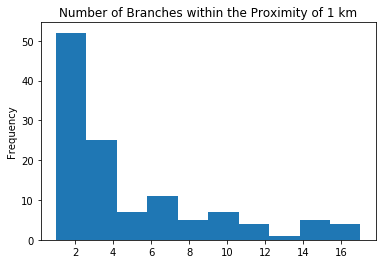

In [19]:
hist = proximity.groupby('From').count()
hist['To'].plot(kind='hist')
plt.title('Number of Branches within the Proximity of 1 km')
#proximity.groupby('From').count()
#proximity[proximity['From']==147]

In [20]:
# The code was removed by Watson Studio for sharing.

{'statusDescription': 'OK', 'traceId': 'ba3b5d8178d44dd4bc86ce2efc6f68fa|BN000021E5|7.7.0.0', 'resourceSets': [{'estimatedTotal': 1, 'resources': [{'origins': [{'longitude': -122.3345, 'latitude': 47.6044}, {'longitude': -122.1185, 'latitude': 47.6731}, {'longitude': -122.1936, 'latitude': 47.6149}], 'results': [{'originIndex': 0, 'destinationIndex': 0, 'travelDuration': 165.723, 'travelDistance': 281.546, 'totalWalkDuration': 0}, {'originIndex': 0, 'destinationIndex': 1, 'travelDuration': 19.312, 'travelDistance': 23.614, 'totalWalkDuration': 0}, {'originIndex': 1, 'destinationIndex': 0, 'travelDuration': 175.545, 'travelDistance': 298.488, 'totalWalkDuration': 0}, {'originIndex': 1, 'destinationIndex': 1, 'travelDuration': 21.597, 'travelDistance': 30.598, 'totalWalkDuration': 0}, {'originIndex': 2, 'destinationIndex': 0, 'travelDuration': 167.583, 'travelDistance': 286.19, 'totalWalkDuration': 0}, {'originIndex': 2, 'destinationIndex': 1, 'travelDuration': 13.635, 'travelDistance': 

In [21]:
# The code was removed by Watson Studio for sharing.

"\nurl = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'\nantarctic_ice_edge = f'{url}/antarctic_ice_edge.json'\nantarctic_ice_shelf_topo = f'{url}/antarctic_ice_shelf_topo.json'\n\n\nm = folium.Map(\n    location=[-59.1759, -11.6016],\n    tiles='Mapbox Bright',\n    zoom_start=2  # Limited levels of zoom for free Mapbox tiles.\n)\n\nfolium.GeoJson(\n    antarctic_ice_edge,\n    name='geojson'\n).add_to(m)\n\nfolium.TopoJson(\n    json.loads(requests.get(antarctic_ice_shelf_topo).text),\n    'objects.antarctic_ice_shelf',\n    name='topojson'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)\n\nm"

#### 11. Conclusion

In this notebook, I can only use public data. As a result, analysis is not very in-depth. If I can make use of internal data for interal purpose, I will be able to provide more useful insights.